In [1]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest

%matplotlib inline

# Data Loading

In [2]:
info = pd.read_csv('C:/Users/lizil/Dropbox/Job/Data/credit_card/cc_info.csv')

In [3]:
info.head(10)

,credit_card,city,state,zipcode,credit_card_limit
0,1280981422329509,Dallas,PA,18612,6000
1,9737219864179988,Houston,PA,15342,16000
2,4749889059323202,Auburn,MA,1501,14000
3,9591503562024072,Orlando,WV,26412,18000
4,2095640259001271,New York,NY,10001,20000
5,1997929794676601,Atlanta,NY,14808,21000
6,5449610971108305,Pittsburgh,PA,15201,6000
7,7482288151831611,Birmingham,NJ,8011,4000
8,8137811493121777,Washington,NH,3280,15000
9,7804216189681274,Los Angeles,CA,90001,20000


In [4]:
info.shape

(984, 5)

In [5]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 5 columns):
credit_card          984 non-null int64
city                 984 non-null object
state                984 non-null object
zipcode              984 non-null int64
credit_card_limit    984 non-null int64
dtypes: int64(3), object(2)
memory usage: 38.5+ KB


In [6]:
info.isnull().sum()

credit_card          0
city                 0
state                0
zipcode              0
credit_card_limit    0
dtype: int64

In [10]:
transaction = pd.read_csv('C:/Users/lizil/Dropbox/Job/Data/credit_card/transactions.csv',parse_dates = ['date'])

In [12]:
transaction.head(10)

,credit_card,date,transaction_dollar_amount,Long,Lat
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370
1,1003715054175576,2015-10-24 22:23:08,103.15,-80.194240,40.180114
2,1003715054175576,2015-10-26 18:19:36,48.55,-80.211033,40.313004
3,1003715054175576,2015-10-22 19:41:10,136.18,-80.174138,40.290895
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719
5,1003715054175576,2015-10-17 21:28:57,121.60,-80.243565,40.260887
6,1003715054175576,2015-08-29 18:34:04,122.65,-80.238186,40.245928
7,1003715054175576,2015-08-14 21:34:39,98.00,-80.244063,40.249143
8,1003715054175576,2015-09-17 19:20:37,95.20,-2.833179,34.745015
9,1003715054175576,2015-09-11 18:59:04,57.95,-80.287528,40.267874


In [13]:
transaction.shape

(294588, 5)

In [14]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294588 entries, 0 to 294587
Data columns (total 5 columns):
credit_card                  294588 non-null int64
date                         294588 non-null datetime64[ns]
transaction_dollar_amount    294588 non-null float64
Long                         294588 non-null float64
Lat                          294588 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 11.2 MB


In [15]:
transaction.isnull().sum()

credit_card                  0
date                         0
transaction_dollar_amount    0
Long                         0
Lat                          0
dtype: int64

In [18]:
transaction.describe()

,credit_card,transaction_dollar_amount,Long,Lat
count,2.945880e+05,294588.000000,294588.000000,294588.000000
mean,5.424562e+15,86.008036,-76.235238,40.937669
std,2.555803e+15,124.655954,20.135015,5.391695
min,1.003715e+15,0.010000,-179.392887,-68.046553
25%,3.344214e+15,29.970000,-80.209708,40.487726
50%,5.353426e+15,58.470000,-73.199737,42.403066
75%,7.646245e+15,100.400000,-72.091933,43.180015
max,9.999757e+15,999.970000,179.917513,78.914330


# Data Merging

In [19]:
data = pd.merge(left = transaction, right = info, how='left',on='credit_card')
data.head(10)

,credit_card,date,transaction_dollar_amount,Long,Lat,city,state,zipcode,credit_card_limit
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370,Houston,PA,15342,20000
1,1003715054175576,2015-10-24 22:23:08,103.15,-80.194240,40.180114,Houston,PA,15342,20000
2,1003715054175576,2015-10-26 18:19:36,48.55,-80.211033,40.313004,Houston,PA,15342,20000
3,1003715054175576,2015-10-22 19:41:10,136.18,-80.174138,40.290895,Houston,PA,15342,20000
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719,Houston,PA,15342,20000
5,1003715054175576,2015-10-17 21:28:57,121.60,-80.243565,40.260887,Houston,PA,15342,20000
6,1003715054175576,2015-08-29 18:34:04,122.65,-80.238186,40.245928,Houston,PA,15342,20000
7,1003715054175576,2015-08-14 21:34:39,98.00,-80.244063,40.249143,Houston,PA,15342,20000
8,1003715054175576,2015-09-17 19:20:37,95.20,-2.833179,34.745015,Houston,PA,15342,20000
9,1003715054175576,2015-09-11 18:59:04,57.95,-80.287528,40.267874,Houston,PA,15342,20000


In [20]:
data.isnull().sum()

credit_card                  0
date                         0
transaction_dollar_amount    0
Long                         0
Lat                          0
city                         0
state                        0
zipcode                      0
credit_card_limit            0
dtype: int64

# Question 1

Your boss wants to identify those users that in your dataset never went above the monthly credit card limit (calendar month). The goal of this is to automatically increase their limit. Can you send him the list of Ids?

In [27]:
data['trans_month'] = data['date'].apply(lambda x: x.month)

In [28]:
data.head(10)

,credit_card,date,transaction_dollar_amount,Long,Lat,city,state,zipcode,credit_card_limit,trans_month
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370,Houston,PA,15342,20000,9
1,1003715054175576,2015-10-24 22:23:08,103.15,-80.194240,40.180114,Houston,PA,15342,20000,10
2,1003715054175576,2015-10-26 18:19:36,48.55,-80.211033,40.313004,Houston,PA,15342,20000,10
3,1003715054175576,2015-10-22 19:41:10,136.18,-80.174138,40.290895,Houston,PA,15342,20000,10
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719,Houston,PA,15342,20000,10
5,1003715054175576,2015-10-17 21:28:57,121.60,-80.243565,40.260887,Houston,PA,15342,20000,10
6,1003715054175576,2015-08-29 18:34:04,122.65,-80.238186,40.245928,Houston,PA,15342,20000,8
7,1003715054175576,2015-08-14 21:34:39,98.00,-80.244063,40.249143,Houston,PA,15342,20000,8
8,1003715054175576,2015-09-17 19:20:37,95.20,-2.833179,34.745015,Houston,PA,15342,20000,9
9,1003715054175576,2015-09-11 18:59:04,57.95,-80.287528,40.267874,Houston,PA,15342,20000,9


In [37]:
total_trans = data[['trans_month','transaction_dollar_amount','credit_card']].groupby(['credit_card','trans_month']).sum().reset_index()
total_trans.head(10)

,credit_card,trans_month,transaction_dollar_amount
0,1003715054175576,7,162.56
1,1003715054175576,8,8441.51
2,1003715054175576,9,11281.56
3,1003715054175576,10,8954.21
4,1013870087888817,7,281.43
5,1013870087888817,8,11981.15
6,1013870087888817,9,12461.96
7,1013870087888817,10,12090.34
8,1023820165155391,7,943.26
9,1023820165155391,8,22741.20


In [38]:
total_trans = pd.merge(left = total_trans, right = info[['credit_card','credit_card_limit']], how='left', on='credit_card')
total_trans.head(10)

,credit_card,trans_month,transaction_dollar_amount,credit_card_limit
0,1003715054175576,7,162.56,20000
1,1003715054175576,8,8441.51,20000
2,1003715054175576,9,11281.56,20000
3,1003715054175576,10,8954.21,20000
4,1013870087888817,7,281.43,15000
5,1013870087888817,8,11981.15,15000
6,1013870087888817,9,12461.96,15000
7,1013870087888817,10,12090.34,15000
8,1023820165155391,7,943.26,28000
9,1023820165155391,8,22741.20,28000


In [49]:
bad_list = list(total_trans[total_trans['transaction_dollar_amount']>total_trans['credit_card_limit']]['credit_card'].unique())

In [56]:
total_list = list(total_trans['credit_card'].unique())

In [53]:
good_list = list(set(total_list)-set(bad_list))

In [54]:
len(good_list)

862

In [58]:
print(good_list)

[6465194079012865, 3742680218482691, 6698437277931525, 3707548197703686, 5275410446848007, 6303154567927815, 7728317158402059, 2519792944246796, 1818161941088271, 4876614541242383, 1664685555838993, 6245684915925010, 6959222140366866, 6325419957422105, 4290726060535834, 2239759218122779, 7195601645654041, 9681744051023898, 3306399358832671, 3702831934212129, 4803218554363943, 8553746017036332, 5814955316793393, 6514175342145589, 8779597037686839, 1222730774437945, 7452262324088889, 1363526625562684, 7838554896273468, 3259748360353854, 6075288092815423, 1461675388467265, 9043793084665932, 6780209767452752, 1169271395749970, 8765140629962839, 6457362521948249, 3417477890619483, 4954103748307036, 6872461016514653, 9472892860209244, 1582804611799136, 7180893798762595, 7581688456986723, 9466839319443564, 7030584443306096, 8822567299944562, 4386321242706043, 2089905184376958, 5930630722779265, 2698111742263426, 5617658887579781, 9758203643408520, 6975663682594960, 7651566467203216, 129520576

In total there are 862 customers have never break the card limit.
Also, there is a quicker way in Python to find the list in A but not in B. That is covert A and B into set first, minus A by B, then covert it back to list.

# Question 2

On the other hand, she wants you to implement an algorithm that as soon as a user goes above her monthly limit, it triggers an alert so that the user can be notified about that.We assume here that at the beginning of the new month, user total money spent gets reset to zero (i.e. she pays the card fully at the end of each month). Build a function that for each day, returns a list of users who went above their credit card monthly limit on that day.

Here I assume we only need the first transaction that break the limit for a given customer in a given month

General Steps:
1. Sort the data frame
2. calculate the cumsum with the appropriate group by
3. find the cumsum that higher than limit
4. find the minimum date of breach by each id each month


In [85]:
sort_data = data[['credit_card','trans_month','date','transaction_dollar_amount']].sort_values(['credit_card','trans_month','date']).reset_index(drop=True)
sort_data.head(10)

,credit_card,trans_month,date,transaction_dollar_amount
0,1003715054175576,7,2015-07-31 20:03:05,45.52
1,1003715054175576,7,2015-07-31 20:25:28,96.10
2,1003715054175576,7,2015-07-31 23:09:32,20.94
3,1003715054175576,8,2015-08-01 10:48:03,51.27
4,1003715054175576,8,2015-08-01 17:43:43,127.99
5,1003715054175576,8,2015-08-01 17:44:19,96.97
6,1003715054175576,8,2015-08-01 19:10:09,97.35
7,1003715054175576,8,2015-08-02 19:39:29,131.43
8,1003715054175576,8,2015-08-02 22:40:59,85.74
9,1003715054175576,8,2015-08-03 00:27:43,80.67


In [86]:
cumsum_data = pd.DataFrame(sort_data.groupby(['credit_card','trans_month'])['transaction_dollar_amount'].cumsum())
cumsum_data.columns = ['trans_cumsum']
cumsum_data.head(10)

,trans_cumsum
0,45.52
1,141.62
2,162.56
3,51.27
4,179.26
5,276.23
6,373.58
7,505.01
8,590.75
9,671.42


In [87]:
sort_data = pd.concat([sort_data,cumsum_data],axis = 1)
sort_data.head(10)

,credit_card,trans_month,date,transaction_dollar_amount,trans_cumsum
0,1003715054175576,7,2015-07-31 20:03:05,45.52,45.52
1,1003715054175576,7,2015-07-31 20:25:28,96.10,141.62
2,1003715054175576,7,2015-07-31 23:09:32,20.94,162.56
3,1003715054175576,8,2015-08-01 10:48:03,51.27,51.27
4,1003715054175576,8,2015-08-01 17:43:43,127.99,179.26
5,1003715054175576,8,2015-08-01 17:44:19,96.97,276.23
6,1003715054175576,8,2015-08-01 19:10:09,97.35,373.58
7,1003715054175576,8,2015-08-02 19:39:29,131.43,505.01
8,1003715054175576,8,2015-08-02 22:40:59,85.74,590.75
9,1003715054175576,8,2015-08-03 00:27:43,80.67,671.42


In [88]:
sort_data = pd.merge(left = sort_data, right = info[['credit_card','credit_card_limit']], on = 'credit_card', how='left')
sort_data.head()

,credit_card,trans_month,date,transaction_dollar_amount,trans_cumsum,credit_card_limit
0,1003715054175576,7,2015-07-31 20:03:05,45.52,45.52,20000
1,1003715054175576,7,2015-07-31 20:25:28,96.10,141.62,20000
2,1003715054175576,7,2015-07-31 23:09:32,20.94,162.56,20000
3,1003715054175576,8,2015-08-01 10:48:03,51.27,51.27,20000
4,1003715054175576,8,2015-08-01 17:43:43,127.99,179.26,20000


In [89]:
alert_data = sort_data[sort_data['trans_cumsum']>sort_data['credit_card_limit']]
alert_data.head()

,credit_card,trans_month,date,transaction_dollar_amount,trans_cumsum,credit_card_limit
1976,1106824181265726,8,2015-08-28 16:48:36,47.54,6037.25,6000
1977,1106824181265726,8,2015-08-28 20:41:36,57.09,6094.34,6000
1978,1106824181265726,8,2015-08-28 20:41:46,179.72,6274.06,6000
1979,1106824181265726,8,2015-08-29 22:27:41,74.27,6348.33,6000
1980,1106824181265726,8,2015-08-30 04:09:29,140.17,6488.50,6000


In [102]:
final_list = alert_data[['credit_card','trans_month','date']].groupby(['credit_card','trans_month']).min().reset_index()
final_list['trans_day']=final_list['date'].apply(lambda x: x.day)
final_list.head()

,credit_card,trans_month,date,trans_day
0,1106824181265726,8,2015-08-28 16:48:36,28
1,1106824181265726,9,2015-09-22 21:47:52,22
2,1106824181265726,10,2015-10-27 21:25:35,27
3,1175962294549313,8,2015-08-28 19:54:28,28
4,1175962294549313,9,2015-09-30 19:02:03,30


In [118]:
def black_list(df, month, day):
    return df[(df['trans_month']==month) & (df['trans_day']==day)]['credit_card'].values

In [119]:
print(black_list(final_list, 9,16))

[2505223645294729 6174559182308122 6766253113444560]


# Question 3

Finally, your boss is very concerned about frauds cause they are a huge cost for credit card companies. She wants you to implement an unsupervised algorithm that returns all transactions that seem unusual and are worth being investigated further.

Based on the info we have, there are two parameters we can use to detect the fraud:
1. The amount of transaction too high compared to majority of the credit card owner's other majority transactions
2. The transaction executed too far away from the credit card owner's home

For the second point, since we dont have the long and lat info for home address, we can consider use the median of the transaction to proxy. Then calculate the euclidian distance between each transaction place to home. 

We will only focus on the first point in this study.

In [139]:
def statistics_by_card(s):
    ps = [25, 50, 75]
    d = np.percentile(s,ps)
    return pd.Series(d,index=['{}%'.format(p) for p in ps])

tran_statistics = transaction.groupby('credit_card')['transaction_dollar_amount'].apply(statistics_by_card).unstack()

In [140]:
tran_statistics = tran_statistics.reset_index()
tran_statistics.head()

,credit_card,25%,50%,75%
0,1003715054175576,59.01,93.73,124.63
1,1013870087888817,58.09,87.67,128.02
2,1023820165155391,55.43,85.78,122.83
3,1073931538936472,108.08,147.19,194.83
4,1077622576192810,122.93,148.18,160.11


In [141]:
cov_data = pd.merge(left = transaction, right = info[['credit_card','credit_card_limit']], how='left',on='credit_card')

In [143]:
cov_data = pd.merge(left=cov_data, right=tran_statistics, on='credit_card', how='left')
cov_data.head()

,credit_card,date,transaction_dollar_amount,Long,Lat,credit_card_limit,25%,50%,75%
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370,20000,59.01,93.73,124.63
1,1003715054175576,2015-10-24 22:23:08,103.15,-80.194240,40.180114,20000,59.01,93.73,124.63
2,1003715054175576,2015-10-26 18:19:36,48.55,-80.211033,40.313004,20000,59.01,93.73,124.63
3,1003715054175576,2015-10-22 19:41:10,136.18,-80.174138,40.290895,20000,59.01,93.73,124.63
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719,20000,59.01,93.73,124.63


## 2D Chart with Premilinary Check

In [144]:
X = cov_data.loc[:,['transaction_dollar_amount','25%', '50%','75%','credit_card_limit']]

In [145]:
X.describe()

,transaction_dollar_amount,25%,50%,75%,credit_card_limit
count,294588.000000,294588.000000,294588.000000,294588.000000,294588.000000
mean,86.008036,43.265113,69.081697,97.282645,15502.053716
std,124.655954,21.471896,35.160028,49.919646,7956.291556
min,0.010000,6.150000,7.320000,9.120000,2000.000000
25%,29.970000,27.960000,43.590000,60.812500,10000.000000
50%,58.470000,40.595000,65.190000,91.832500,15000.000000
75%,100.400000,56.215000,89.710000,127.345000,20000.000000
max,999.970000,137.690000,222.290000,318.730000,55000.000000


In [149]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans

In [150]:
## Scale and standardize before plotting the 2D PCA
X = scale(X)
## this will covert each column to mean 0 and sd of 1

C:\Users\lizil\Downloads\Pycharm\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


In [159]:
pca = PCA(n_components=2)
X2d = pca.fit_transform(X)
X2d = pd.DataFrame(X2d,columns=['pc1','pc2'])

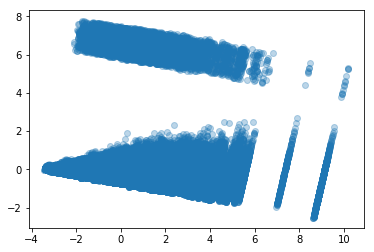

In [161]:
plt.scatter(X2d.pc1,X2d.pc2,alpha=0.3)

By projecting the original 5 dimensions into the 2 dimensions using PCA, we can gather some preliminary idea of how many clusters there are.

We can then further do the cluster analysis to label all transactions

## KMeans Clustering Analysis

In [162]:
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters,n_jobs=-1)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [164]:
X2d['label'] = kmeans.labels_
X2d.label.value_counts()

3    109705
0     73288
1     51809
5     28945
2     25405
4      5436
Name: label, dtype: int64

The number 4 group contains less value, which are suspicious among other clusters. 

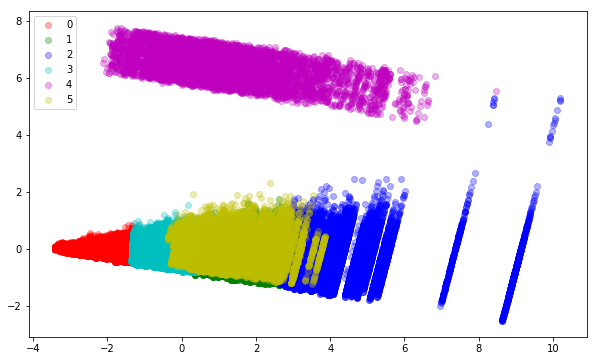

In [167]:
import itertools
colors = itertools.cycle( ['r','g','b','c','m','y','k'] )

plt.rc('figure',figsize=(10,6))
for label in range(n_clusters) :
    temp = X2d.loc[X2d.label == label,:]
    plt.scatter(temp.pc1,temp.pc2,c=next(colors),label=label,alpha=0.3)

plt.legend(loc='best')

Number 4 cluster is the purple trunk at the left up corner.

In [168]:
suspicious_label = X2d.label.value_counts().argmin()
suspicious_label

4

In [175]:
suspect = cov_data.loc[X2d.label==suspicious_label,['credit_card','transaction_dollar_amount','25%','50%','75%','credit_card_limit','date']].reset_index(drop=True)

In [176]:
suspect.head(10)

,credit_card,transaction_dollar_amount,25%,50%,75%,credit_card_limit,date
0,1003715054175576,995.35,59.01,93.73,124.63,20000,2015-09-11 19:50:02
1,1003715054175576,818.47,59.01,93.73,124.63,20000,2015-10-01 20:44:09
2,1003715054175576,888.04,59.01,93.73,124.63,20000,2015-10-18 01:01:41
3,1003715054175576,859.31,59.01,93.73,124.63,20000,2015-08-24 15:14:52
4,1003715054175576,925.78,59.01,93.73,124.63,20000,2015-09-24 22:10:07
5,1003715054175576,905.54,59.01,93.73,124.63,20000,2015-09-02 20:54:00
6,1013870087888817,898.00,58.09,87.67,128.02,15000,2015-09-01 18:23:13
7,1013870087888817,848.21,58.09,87.67,128.02,15000,2015-09-20 23:53:12
8,1013870087888817,811.25,58.09,87.67,128.02,15000,2015-10-05 00:14:43
9,1013870087888817,972.63,58.09,87.67,128.02,15000,2015-08-19 19:12:24


From the result list we can see that almost all records in cluster 4 are the transaction amount way higher than normal, even way higher than the 75% quantile of the own's history. Therefore they need further investigation.